# Ettoday 網路爬蟲實作練習


* 能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構


## 作業目標

根據範例：

* 取出今天所有的新聞
* 取出今天下午三點到五點的新聞
* 根據範例，取出三天前下午三點到五點的新聞

## 根據範例，取出今天所有的新聞

In [1]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import time
from datetime import date, timedelta

In [2]:
url = 'https://www.ettoday.net/news/news-list.htm'

browser = webdriver.Chrome(executable_path='../Chromedriver/chromedriver.exe')
browser.get("https://www.ettoday.net/news/news-list.htm")

In [3]:
for _ in range(20):
    time.sleep(2)
    browser.execute_script("window.scrollTo(0, 15000);")

In [4]:
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'lxml')

<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><head><script async="" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl_fy2019.js"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2019121002.js"></script><script async="" src="https://onead.onevision.com.tw/external.php?category=-1&amp;cookie=true&amp;uid=1000019&amp;ip=&amp;volume=0&amp;channel=21&amp;isip_index=0&amp;response_freq_multiple=incover.1
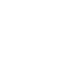
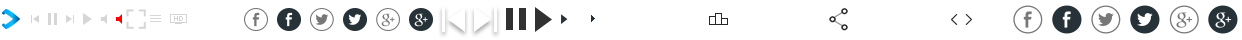
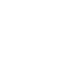
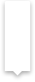
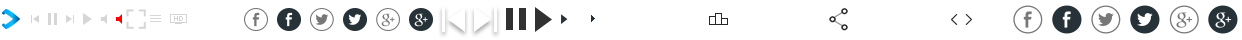

In [5]:
print(soup)

In [6]:
news = dict()

for d in soup.find(class_='part_list_2').find_all('h3'):
    date_txt = d.find(class_='date').text
    timing = time.strptime(date_txt, '%Y/%m/%d %H:%M')
    title = d.find('a').text
    if timing not in news:
        news[timing] = [title]
    else:
        news[timing].append(title)
    print(date_txt, title)

2019/12/23 20:27 「素娥」梁舒涵嘟嘴向曾子余索吻　自認「撒嬌人妻型」
2019/12/23 20:25 環島之星觀光列車初體驗　「台鐵小林志玲」池佳真擔任列車長
2019/12/23 20:20 外資放假去！台股進入作夢行情　法人看好後市3題材
2019/12/23 20:19 快訊／郭台銘「真心後悔退選」　2020袖手不旁觀
2019/12/23 20:17 韋汝簽密約禁談遠航張綱維！　爆封口月領15萬…超強生財術曝光
2019/12/23 20:17 聖誕趴嗨飲「40％私釀椰子酒」…集體甲醇中毒　菲律賓11死300人送醫
2019/12/23 20:15 Jasper哄4歲女孩吃飯！　「使出3招數」成功說服對方
2019/12/23 20:14 鄭宏輝：要拼經濟拼科技　工商界領袖集結全力支持
2019/12/23 20:13 SM男偶像「簽名＋愛心畫滿」想給粉絲驚喜　全世界唯一專輯「被親媽買走」
2019/12/23 20:12 中職／胡搞！打不進奧運停辦明星賽　不重視乾脆永久停辦
2019/12/23 20:11 快訊／韓國瑜毀3贏局面！郭台銘讚「韓粉有進步」嘆：讓我出來就好
2019/12/23 20:03 余苑綺化療1個月吐20天！　肺腫瘤消了「換動刀救肝」
2019/12/23 20:01 妹妹看卡通！主子爬身上「討抱抱」　網笑：好像小情侶
2019/12/23 19:57 德誼數位Beats耳機最低2.8折　限時限量、優惠聖誕節開跑
2019/12/23 19:57 吳青峰15歲嫩照出土...瘋狂追星史曝光「排隊參加阿妹簽唱會」
2019/12/23 19:54 2020年裝修看這邊！　居家裝潢星座幸運色添好運
2019/12/23 19:53 因為他才有PTT！　「BBS創造者」蘭迪·蘇斯享壽74歲過世
2019/12/23 19:51 馬思純熱情打招呼！侯佩岑冷淡回應：我現在不跟妳說話
2019/12/23 19:50 柯佳嬿苦追《想見你》6集　刷PTT留言怒了…全是「許光漢好帥」！
2019/12/23 19:50 2020鼠年限定美妝太吸睛！除了米奇青春露　雅頓黃金膠囊、精品香氛也跟上
2019/12/23 19:46 曾雅蘭太操勞「癌指數升高」全身冒50顆腫瘤！　侯昌明體貼舉動疼妻
2019/12/23 19:36 台商回台炒

## 取出今天下午三點到五點的新聞

In [7]:
def fetchNews(from_date, to_date, news):
    ret = dict()
    for k, v in news.items():
        if from_date <= k and k <= to_date:
            ret[k] = v
    return ret

In [8]:
today = date.today()
year, month, day = today.year, today.month, today.day
today_pm3 = time.strptime('{}/{}/{} {}:{}'.format(year, month, day, 15, 0), '%Y/%m/%d %H:%M')
today_pm5 = time.strptime('{}/{}/{} {}:{}'.format(year, month, day, 17, 0), '%Y/%m/%d %H:%M')

In [9]:
ans2 = fetchNews(today_pm3, today_pm5, news)

In [10]:
for k, v in ans2.items():
    timing = time.strftime('%Y/%m/%d %H:%M', k)
    for title in v:
        print(timing, title)

2019/12/23 17:00 口湖四湖競總成立　張嘉郡籲青年接棒拚建設繁榮雲林
2019/12/23 17:00 欠吃熊熊牛奶鍋！新竹最浮誇火鍋店　蛤蜊鍋鮮甜、肉質肥美
2019/12/23 16:58 主計總處：11月失業率3.73%　就業人數增幅創10年新低　
2019/12/23 16:57 快訊／韓國瑜台南升旗轉彎了！7點40分在高雄9點10分再到台南
2019/12/23 16:57 三星新一代無線耳機Galaxy Buds將問世　電池續航時間更長！
2019/12/23 16:57 愛運動飽受心臟無端電擊　心律不整患者可用皮下去顫器
2019/12/23 16:56 民宿業者充當聖誕老公公　禮物竟是帶中途之家孩子「飛上天」
2019/12/23 16:54 中職／統一獅提升訓練環境　整修室內練習場
2019/12/23 16:53 沼田幹夫估蔡英文、韓國瑜差距5％內　賴清德：不可大意！
2019/12/23 16:52 昔空軍中校變共諜！利誘現役軍官「消極不作為」：發揮關鍵作用　遭檢察官起訴
2019/12/23 16:51 影／台股何時衝破歷史高點12682點？分析師：年前機會大
2019/12/23 16:51 上完沒？16歲老貓「臭臉走來」等廁所　炸毛背後原因好心疼
2019/12/23 16:50 邊境大展牧羊本能！男星家人走太慢　牠跑到隊伍後頭「鼻子推推」
2019/12/23 16:48 沖繩首里城燒毀　台灣捐款550萬日圓助重建
2019/12/23 16:48 加速機制發威！5G第10天總標金衝高至546.72億　底價2倍多
2019/12/23 16:48 15歲資優女清晨學校詭異墜亡！警方禁止「家長看遺體」　校方全神隱禁言
2019/12/23 16:46 台灣犬宣布告終？　吳志揚：中華隊只能用CT沒有犬
2019/12/23 16:45 13歲國二生騎單車摔倒...雙手粉碎性骨折　醫曝關鍵：體重95kg
2019/12/23 16:44 韓國瑜親吻爆哭女嬰掀討論　賴清德：這會有什麼問題嗎？
2019/12/23 16:44 陳妍希PO兒子「3歲慶生照」！　網友驚喊：鼻子長得好像爸爸
2019/12/23 16:44 必吃10大年菜榜單最新出爐　佛跳牆跌下Top1連前3大都沒入榜
2019/12/23 16:44 2019年度最爛

## 根據範例，取出三天前下午三點到五點的新聞

In [11]:
three_days_before = date.today() - timedelta(days=3)
year, month, day = three_days_before.year, three_days_before.month, three_days_before.day

Select(browser.find_element_by_id('selD')).select_by_value(str(day))
Select(browser.find_element_by_id('selM')).select_by_value(str(month))
Select(browser.find_element_by_id('selY')).select_by_value(str(year))
browser.find_element_by_id('formCalendar').find_element_by_id('button').click()

In [17]:
for _ in range(60):
    time.sleep(2)
    browser.execute_script("window.scrollTo(0, 15000);")
    
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'lxml')

In [18]:
news = dict()

for d in soup.find(class_='part_list_2').find_all('h3'):
    date_txt = d.find(class_='date').text
    timing = time.strptime(date_txt, '%Y/%m/%d %H:%M')
    title = d.find('a').text
    if timing not in news:
        news[timing] = [title]
    else:
        news[timing].append(title)
    print(date_txt, title)

2019/12/20 23:57 和億集團攜手大金祭好禮　跨界打造好氣場搶攻年底聚餐商機
2019/12/20 23:56 快訊／川普推特發文：與習近平通話貿易戰　「非常好的交談」
2019/12/20 23:56 56歲名嘴彭華幹被嗆生活白癡！　不會分青菜泡麵加「有毒植物」：吃一口拉肚子
2019/12/20 23:51 男星缺席《女力》記者會！爆料「驚人真實內幕」：真的很幽默
2019/12/20 23:48 女友要跟異性合租！他急PO文求助：是我太專制嗎…網聽原因臉秒綠：租了直接分
2019/12/20 23:46 男子墜樓傷重不治　南警呼籲身分指認讓他回家
2019/12/20 23:43 58歲費翔演紂王…炸出超大胸肌！　妲己「摸胸共浴」轉圈圈
2019/12/20 23:41 手機電量剩5%急瘋！她搭高鐵找充電站　敲門卻見「超自私一幕」怒了
2019/12/20 23:40 圖／政見對決！張善政狂端「數位、產業、社福」27項政策牛肉一次看
2019/12/20 23:37 英國下議院壓倒性通過「脫歐草案」　為明年1月31日脫歐鋪路
2019/12/20 23:34 台灣製造萬能鉗登上Discovery　九家中小企業接棒投資40億元
2019/12/20 23:29 竹縣第二選區／選情三角督！鄭朝方縣長失利再戰　擺脫藍綠擁竹東票倉突圍
2019/12/20 23:26 宋旻浩瞎掰造單字　硬拗「上網可以查到」！竟真的登韓網熱搜冠軍
2019/12/20 23:26 泡湯能緩解疲勞？「3大錯誤觀念」一次解析　運動完馬上泡恐休克
2019/12/20 23:17 《玩命關頭》辦演唱會...有CP查理！　台粉131飛美國見馮迪索「好康曝光」
2019/12/20 23:15 東森直銷成立2年業績達9.3億創紀錄！ 王令麟：5年內搶攻台灣直銷業龍頭地位
2019/12/20 23:15 甲山林售樓總部北南連線　新手爸媽都來搶當全台最強包租公
2019/12/20 23:14 大專足聯／輔大劉智文捨香菇頭定決心　有表哥隊長開導還在適應
2019/12/20 23:05 SBL／基恩觀察期表現不俗　是否能成裕隆控衛荒解藥？
2019/12/20 23:03 點燃學習的無限可能　台南教育局年終成果發表會展成果
2019/12/20 23:03 蔡依林曬粉髮自拍！一看「這部

In [19]:
three_day_before_pm3 = time.strptime('{}/{}/{} {}:{}'.format(year, month, day, 15, 0), '%Y/%m/%d %H:%M')
three_day_before_pm5 = time.strptime('{}/{}/{} {}:{}'.format(year, month, day, 17, 0), '%Y/%m/%d %H:%M')

In [20]:
ans3 = fetchNews(three_day_before_pm3, three_day_before_pm5, news)

In [21]:
for k, v in ans3.items():
    timing = time.strftime('%Y/%m/%d %H:%M', k)
    for title in v:
        print(timing, title)

2019/12/20 17:00 鄉民狂推！台中酥香黃金臭豆腐　還有料多味噌湯+冬瓜茶免費喝
2019/12/20 16:58 遭爆提前解約派遣員工120名　英業達：因應貿易戰調節人力
2019/12/20 16:57 金門人限定！獨享東森購物滿額免運　再請喝熱拿鐵
2019/12/20 16:57 他問「電影院為何不推月、年票？」　內行點破真相：會虧爆...曝國外制度
2019/12/20 16:54 搶匪「沿途瘋狂砍人劫車」釀1死3傷　被警包圍「徒步落跑」！
2019/12/20 16:54 加拿大禁止幫電子煙打廣告　多省販售年齡拉高、禁賣多種口味
2019/12/20 16:52 張善政談副手政見會：參選是蔡英文做得糟糕　我不會攻擊賴清德
2019/12/20 16:49 張善政稱蔡英文留美房間有黨外雜誌　綠營人士反批癡漢：整天講五四三
2019/12/20 16:49 【廣編】農業精品「點亮臺灣，迎向世界」　百大精品1219齊亮相
